# K-Means 알고리즘

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## iris 데이터로 군집화

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=['sl', 'sw', 'pl', 'pw'])
df.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## k-means 모델 생성/학습

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    n_clusters=3, 
    init='k-means++',
    max_iter=300,
    random_state=2021
)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=2021)

In [4]:
# 결과
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [5]:
# 실제 target class
df['target'] = dataset.target
# Clustering 결과로 도출된 class
df['cluster'] = kmeans.labels_
df.head()

,sl,sw,pl,pw,target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [6]:
clustering_result = df.groupby(['target', 'cluster']).count()
clustering_result.head()

sl  sw  pl  pw
target cluster                
0      0        50  50  50  50
1      1        48  48  48  48
       2         2   2   2   2
2      1        14  14  14  14
       2        36  36  36  36

## 군집화 결과르 차원 축소하여 시각화

In [7]:
# 차원 축소
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=2).fit_transform(scaler.fit_transform(dataset.data))

In [8]:
df['pca_x'] = pca[:, 0]
df['pca_y'] = pca[:, 1]
df.head()

,sl,sw,pl,pw,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,0,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,0,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,0,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,0,-2.389842,0.646835


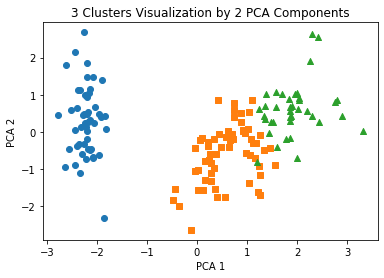

In [9]:
# clustering 데이터 시각화
cls0_index = df.query("cluster == 0").index
cls1_index = df.query("cluster == 1").index
cls2_index = df.query("cluster == 2").index

plt.scatter(
    x=df.loc[cls0_index, 'pca_x'], 
    y=df.loc[cls0_index, 'pca_y'],
    marker='o'
)
plt.scatter(
    x=df.loc[cls1_index, 'pca_x'], 
    y=df.loc[cls1_index, 'pca_y'],
    marker='s'
)
plt.scatter(
    x=df.loc[cls2_index, 'pca_x'], 
    y=df.loc[cls2_index, 'pca_y'],
    marker='^'
)

plt.title('3 Clusters Visualization by 2 PCA Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

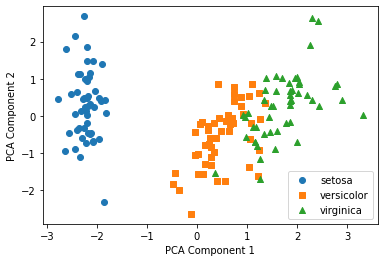

In [10]:
# 원본 데이터 시각화
markers=['o', 's', '^']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target'] == i]['pca_x']
    y_axis_data = df[df['target'] == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=dataset.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## 비교 그림 그려볼 것

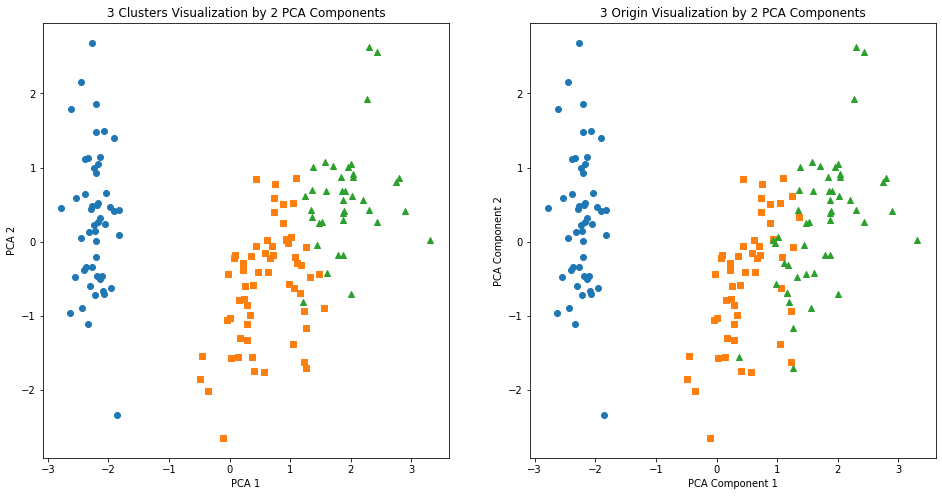

In [15]:
markers=['o', 's', '^']

plt.figure(figsize=(16,8))

# clustering
plt.subplot(1,2,1)
for i, marker in enumerate(markers):
    plt.scatter(
        x=df.loc[df.query("cluster == @i").index, 'pca_x'], 
        y=df.loc[df.query("cluster == @i").index, 'pca_y'],
        marker=marker
    )
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# origin
plt.subplot(1,2,2)
for i, marker in enumerate(markers):
    x_axis_data = df.query("target == @i")['pca_x']
    y_axis_data = df.query("target == @i")['pca_y']
    plt.scatter(
        x_axis_data, 
        y_axis_data, 
        marker=marker, 
        label=dataset.target_names[i]
    )
plt.title('3 Origin Visualization by 2 PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

## Clustering 알고리즘 테스트를 위한 데이터 생성

In [12]:
from sklearn.datasets import make_blobs
X, y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=3,
    cluster_std=3,
    random_state=2021
)
print(X.shape, y.shape)

(200, 2) (200,)


In [13]:
# target의 분포
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [14]:
df = pd.DataFrame(X, 
    columns=['ftr1', 'ftr2']
)
df['target'] = y
df.head()

,ftr1,ftr2,target
0,-2.870830,-0.543596,1
1,9.691286,-14.448113,2
2,9.583819,-11.116303,2
3,6.980622,-9.033997,2
4,-6.296733,2.696087,1


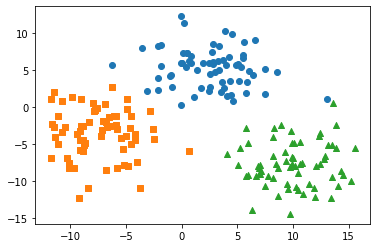

In [15]:
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

target_list = np.unique(y)
for target in target_list:
    cluster = df.query("target == @target")
    plt.scatter(
        x=cluster['ftr1'], 
        y=cluster['ftr2'],
        marker=markers[target]
    )

plt.show()

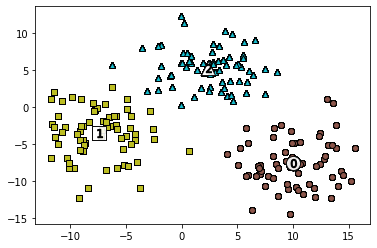

In [16]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, random_state=2021)
labels = kmeans.fit_predict(X)
df['kmeans_label'] = labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
uniques = np.unique(labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in labels:
    cluster = df.query("kmeans_label == @label")
    center_x_y = centers[label]
    plt.scatter(
        x=cluster['ftr1'],
        y=cluster['ftr2'],
        edgecolors='k',
        marker=markers[label]
    )

    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(
        x=center_x_y[0],
        y=center_x_y[1],
        s=200,
        color='white',
        alpha=0.9,
        edgecolors='k',
        marker=markers[label]
    )
    plt.scatter(
        x=center_x_y[0], 
        y=center_x_y[1], 
        s=70, 
        color='k', 
        edgecolor='k', 
        marker='$%d$' % label
    )

In [17]:
df.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       2               66
        0                1
1       1               67
2       0               66
Name: kmeans_label, dtype: int64